Pranav Kumar,
prn 1032200232,
FY BTECH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('/content/Titanic-Dataset.csv')

In [2]:
print("Dataset shape:", data.shape)
print("\nDataset columns:", data.columns)
print("\nDataset description:\n", data.describe())

Dataset shape: (891, 12)

Dataset columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Dataset description:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0

In [3]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


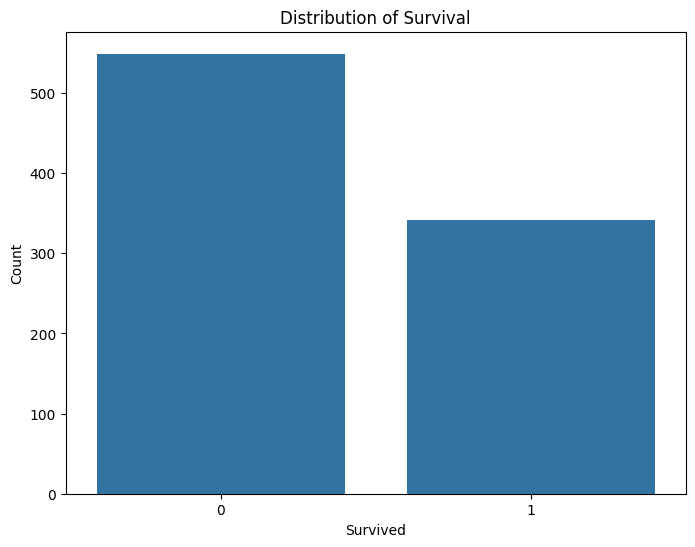

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data)
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Distribution of Survival")
plt.show()

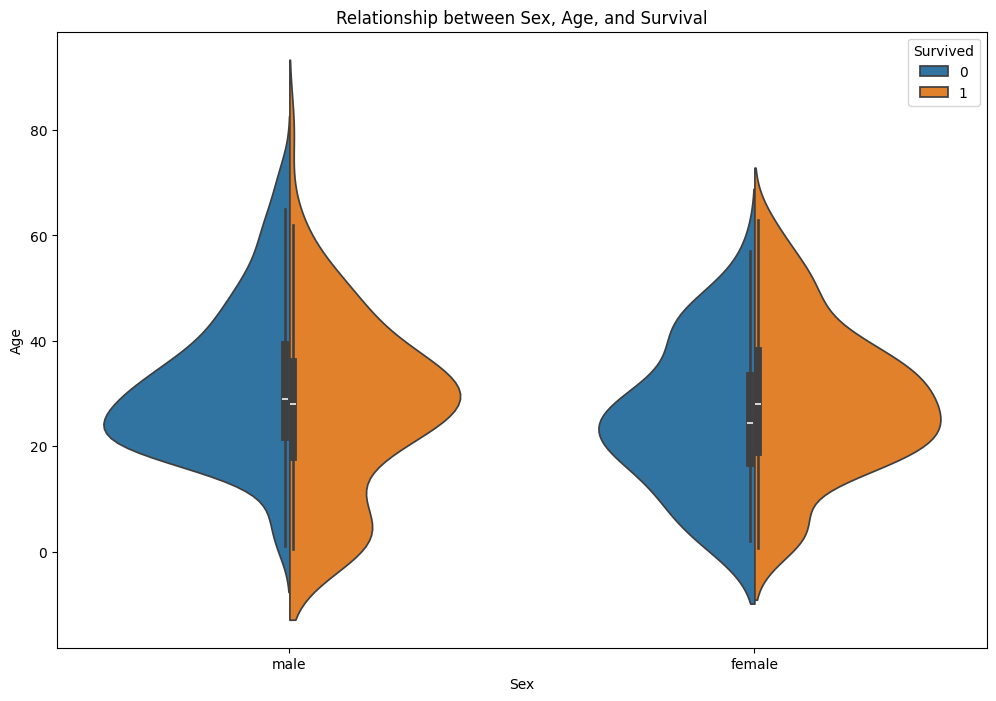

In [5]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True)
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Relationship between Sex, Age, and Survival")
plt.show()

In [6]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
data.loc[:, 'Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = data.dropna()

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Accuracy: 0.7482517482517482

Confusion Matrix:
 [[71 16]
 [20 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [7]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("Coefficients:\n", coefficients)
print("Intercept:", model.intercept_)

Coefficients:
   Feature  Coefficient
0  Pclass    -1.207928
1     Sex     2.610998
2     Age    -0.048520
3   SibSp    -0.352277
4   Parch    -0.058168
5    Fare     0.002144
Intercept: [2.82774384]


In [8]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
importance = importance.sort_values('Importance', ascending=False)
print("Feature Importance:\n", importance)

Feature Importance:
   Feature  Importance
1     Sex    2.610998
0  Pclass    1.207928
3   SibSp    0.352277
4   Parch    0.058168
2     Age    0.048520
5    Fare    0.002144
